# Salary Prediction of Data Science Jobs 

## Introduction

The objective of this analysis is to fit and compare 4 different models to predict the salaries offered by various data science job positions using the data collected from job ads posted on glassdoor by several US compaines. 

This report is organized as follows:

* Section 1 Overview
* Section 2 Data Preprocessing
* Section 3 Data Exploration & Visualisation
* Section 4 Data Modelling
* Section 5 Summary


## Overview

### Data Source 

The dataset contains 2.4k observations. The descriptive features include 3 numeric and 9 nominal categorical features. The target feature is a continuous variable containing the average salaries of each job posting. The dataset was sourced from Kaggle at https://www.kaggle.com/atharvap329/glassdoor-data-science-job-data. 

## Data Preprocessing

### Importing the required packages and loading dataset 

All the packages required for this analysis are imported into the notebook. Following this, the csv files containing the data for each state is imported using the read.csv in pandas. Since, the data is in multiple csv files, they are combined to form a single dataframe job_df. 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


pd.options.mode.chained_assignment = None

In [2]:
df_sf = pd.read_csv('Data_Job_SF.csv', na_values=['-1'])
df_tx = pd.read_csv('Data_Job_TX.csv', na_values=['-1'])
df_wa = pd.read_csv('Data_Job_WA.csv', na_values=['-1'])

#Merging the data from three files
job_df = pd.concat([df_sf , df_tx,df_wa] , axis = 0 , ignore_index = True)
pd.set_option('display.max_columns', None) 

print(job_df.shape)
print("----------------------------")
print(job_df.info())

(2424, 12)
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 12 columns):
Job_title      2424 non-null object
Company        2424 non-null object
State          2422 non-null object
City           2418 non-null object
Min_Salary     1777 non-null float64
Max_Salary     1777 non-null float64
Job_Desc       2424 non-null object
Industry       2100 non-null object
Rating         2189 non-null float64
Date_Posted    2424 non-null object
Valid_until    2424 non-null object
Job_Type       2424 non-null object
dtypes: float64(3), object(9)
memory usage: 227.3+ KB
None


The datset has a total of 2424 observations consisting of 12 descriptive features. The target feature, Average Salary is a combination of the features Min_Salary and Max_Salary. 

In [3]:
#Checking ID like columns
print(job_df.loc[: ,job_df.nunique() == 1].columns)

Index([], dtype='object')


Next, we check for missing values in the dataset. A heatmap is plotted to visualize the amount of missing values.

[Text(0.5, 0, 'Job_title'),
 Text(1.5, 0, 'Company'),
 Text(2.5, 0, 'State'),
 Text(3.5, 0, 'City'),
 Text(4.5, 0, 'Min_Salary'),
 Text(5.5, 0, 'Max_Salary'),
 Text(6.5, 0, 'Job_Desc'),
 Text(7.5, 0, 'Industry'),
 Text(8.5, 0, 'Rating'),
 Text(9.5, 0, 'Date_Posted'),
 Text(10.5, 0, 'Valid_until'),
 Text(11.5, 0, 'Job_Type')]

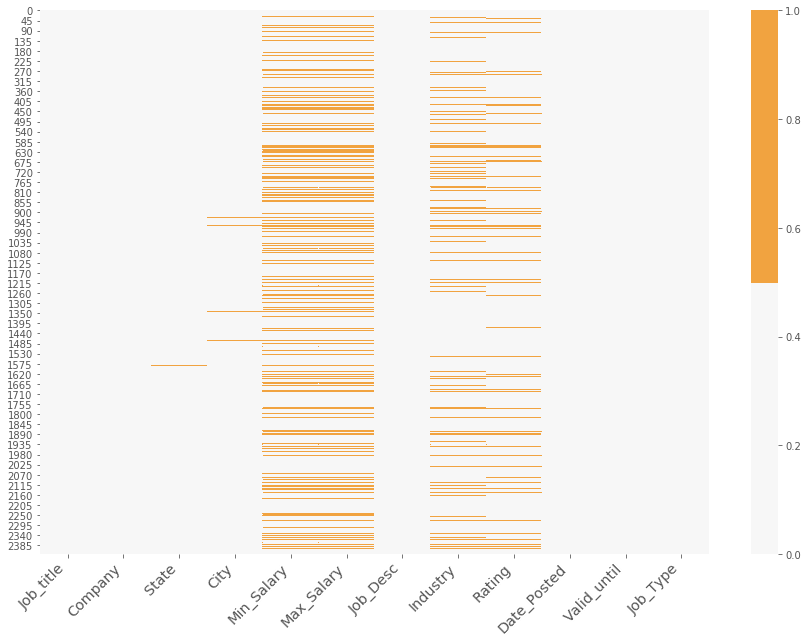

In [4]:
#Checking for missing values
matplotlib.rcParams['figure.figsize'] = (15,10)

colours = ['#f7f7f7', '#f1a340'] # specify the colours - yellow is missing. blue is not missing.
chart = sns.heatmap(job_df.isnull(), cmap=sns.color_palette(colours))

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)

From the above heatmap, we can see that there is a significant number of missing values in the features in_Salary, Max_Salary, Industry and Rating represented by the orange lines. There are a few missing values in the City feature and two missing values in the State feature. Next, we check the actual count of these missing value using the isna() function.

In [5]:
#fetching the counts for missing values
null_col_list = [col for col in job_df.columns if job_df[col].isna().any()]
job_df[null_col_list].isna().sum()

State           2
City            6
Min_Salary    647
Max_Salary    647
Industry      324
Rating        235
dtype: int64

In [6]:
pct_missing = np.mean(job_df['Industry'].isnull())
print('{}%'.format(round(pct_missing*100)))

13.0%


In [7]:
#Imputing for State and city

#State
state_index = job_df[job_df['State'].isnull() == True].index
job_df.loc[state_index,:]

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
1585,Data Scientist,HRUCKUS,NaN,"Crystal City, state=Virginia, Virginia",NaN,NaN,This company is in a hiring surge in response ...,Business Services,5.0,2020-05-02,2020-06-06,FULL_TIME
1791,Machine Learning Scientist,HRUCKUS,NaN,"Crystal City, state=Virginia, Virginia",NaN,NaN,This company is in a hiring surge in response ...,Business Services,5.0,2020-05-02,2020-06-06,FULL_TIME


Examining the missing values in the state feature, we can that the state name is included along with the city name.The nan values are imputed with the respective state names and the state name is removed from the city feature.

In [8]:
#Imputing the correct value after inspecting
job_df.loc[state_index,'State'] = 'VA'
job_df.loc[state_index,'City'] = 'Crystal City'
job_df.loc[state_index,:]

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
1585,Data Scientist,HRUCKUS,VA,Crystal City,NaN,NaN,This company is in a hiring surge in response ...,Business Services,5.0,2020-05-02,2020-06-06,FULL_TIME
1791,Machine Learning Scientist,HRUCKUS,VA,Crystal City,NaN,NaN,This company is in a hiring surge in response ...,Business Services,5.0,2020-05-02,2020-06-06,FULL_TIME


Following this, we take a look at the observations with missing city feature.

In [9]:
#City
city_index = job_df[job_df['City'].isnull() == True].index
job_df.loc[city_index,:]

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
925,Data Scientist,"Next Level Business Services, Inc.",Texas,NaN,NaN,NaN,"Greetings,\n\nI hope you are doing well.\n\nPl...",Information Technology,4.4,2020-05-04,2020-06-06,FULL_TIME
961,Data scientist,LiveMindz,Texas,NaN,NaN,NaN,"Need Data Engineer,Data Scientist",NaN,NaN,2020-04-28,2020-06-06,FULL_TIME
1128,Research Scientist,The University of Texas at Dallas,Texas,NaN,NaN,NaN,Posting Number: S02931P\n\nDepartment: Compute...,Education,4.2,2020-05-03,2020-06-06,FULL_TIME
1344,"Software Engineer - System and DevOps, AMP Dat...",Apple,Texas,NaN,NaN,NaN,This company is in a hiring surge in response ...,Information Technology,4.1,2020-05-06,2020-06-06,FULL_TIME
1345,"Software Engineer – Full Stack, AMP Data Scien...",Apple,Texas,NaN,NaN,NaN,This company is in a hiring surge in response ...,Information Technology,4.1,2020-05-06,2020-06-06,FULL_TIME
1474,Sr. Data Analyst/Systems Analyst,DatamanUSA,Texas,NaN,NaN,NaN,Â\n\nTitle:ÂSenior Data Analyst\n\nDuration:Â1...,Information Technology,3.4,2020-04-29,2020-06-06,FULL_TIME


In [10]:
# Removing the nan values from Min_Salary
job_df = job_df[job_df['Min_Salary'].notna()]

In [11]:
job_df.shape

(1777, 12)

[Text(0.5, 0, 'Job_title'),
 Text(1.5, 0, 'Company'),
 Text(2.5, 0, 'State'),
 Text(3.5, 0, 'City'),
 Text(4.5, 0, 'Min_Salary'),
 Text(5.5, 0, 'Max_Salary'),
 Text(6.5, 0, 'Job_Desc'),
 Text(7.5, 0, 'Industry'),
 Text(8.5, 0, 'Rating'),
 Text(9.5, 0, 'Date_Posted'),
 Text(10.5, 0, 'Valid_until'),
 Text(11.5, 0, 'Job_Type')]

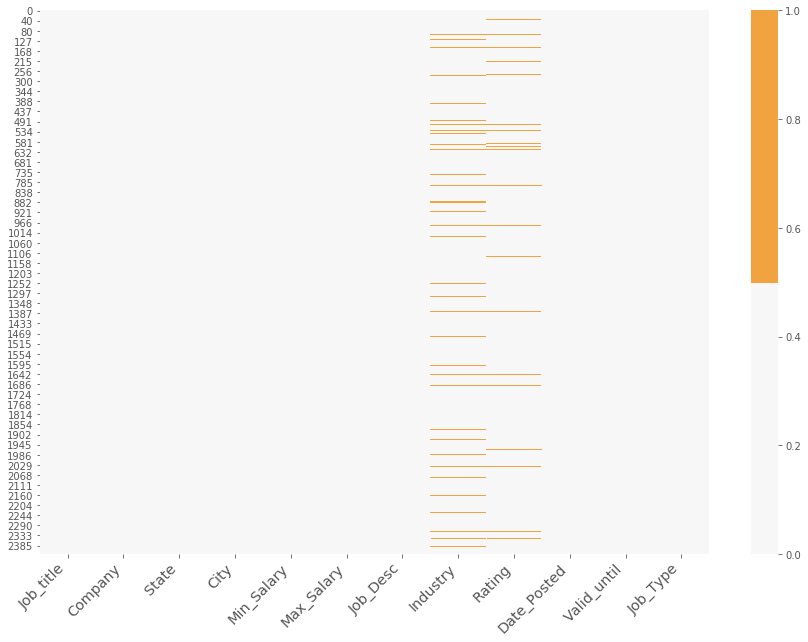

In [12]:
#Checking for missing values
matplotlib.rcParams['figure.figsize'] = (15,10)

colours = ['#f7f7f7', '#f1a340'] # specify the colours - yellow is missing. blue is not missing.
chart = sns.heatmap(job_df.isnull(), cmap=sns.color_palette(colours))

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)

Removing the nan values from the Industry and Rating Feature.

In [13]:
job_df = job_df[job_df['Industry'].notna() & job_df['Rating'].notna()]

Finally, we check if there are anymore missing values left in the dataset. 

In [14]:
job_df.isna().sum()

Job_title      0
Company        0
State          0
City           0
Min_Salary     0
Max_Salary     0
Job_Desc       0
Industry       0
Rating         0
Date_Posted    0
Valid_until    0
Job_Type       0
dtype: int64

Since there are no more missing in the dataset. We move onto some feature transformation. In order to make good use of the Job_Desc feature, we introduce a few additonal features using some frequently occuring keywords in the IT job decriptions. These features are of binary nature and shows if a job description contains this specific keyword or not. The keywords considered here are python, aws and visualization.

In [15]:
df = pd.DataFrame()
keyskills = ['python','aws','visualization']

for keyword in keyskills:
    job_df[keyword] = job_df['Job_Desc'].apply(lambda x: 1 if keyword in x.lower() else 0)
    print(job_df[keyword].value_counts())

0    911
1    734
Name: python, dtype: int64
0    1286
1     359
Name: aws, dtype: int64
0    1332
1     313
Name: visualization, dtype: int64


In [16]:
job_df.head(10)

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type,python,aws,visualization
0,Senior Data Scientist - Underwriting Algorithms,Faire,CA,San Francisco,151875.0,170407.0,Faire is using machine learning to change whol...,Business Services,4.3,2020-05-06,2020-06-05,FULL_TIME,0,0,0
1,Data Scientist,GovTech,CA,San Francisco,78594.0,147225.0,We are looking for Data Scientists who are int...,Government,3.6,2020-05-01,2020-06-05,FULL_TIME,1,0,0
2,Data Scientist,Triplebyte,CA,San Francisco,145000.0,225000.0,This company is in a hiring surge in response ...,Information Technology,3.6,2020-04-28,2020-06-05,FULL_TIME,0,0,0
3,Data Scientist,Notion Labs,CA,San Francisco,105765.0,142959.0,"So, what will you do as a Data Scientist at No...",Information Technology,5.0,2020-05-04,2020-06-05,FULL_TIME,0,0,0
5,Staff Machine Learning Engineer,Tapjoy,CA,San Francisco,137705.0,224163.0,Join the Mobile Future with Tapjoy\n\nData Sci...,Information Technology,3.5,2020-04-24,2020-06-05,FULL_TIME,1,0,0
6,Senior Data Scientist,Autodesk,CA,San Francisco,163578.0,182543.0,This company is in a hiring surge in response ...,Information Technology,4.0,2020-05-01,2020-06-05,FULL_TIME,0,0,0
7,Data Scientist,Formation,CA,San Francisco,119642.0,135250.0,Formation provides personalization for the lar...,Information Technology,3.1,2020-04-29,2020-06-05,FULL_TIME,0,0,0
8,Director of Data,Strava,CA,San Francisco,84400.0,167186.0,"About StravaStrava is Swedish for ""strive,"" wh...",Information Technology,4.4,2020-05-05,2020-06-05,FULL_TIME,0,0,0
9,Data Scientist,Duetto,CA,San Francisco,108809.0,173353.0,"We are an ambitious, well-funded, high-growth ...",Information Technology,4.4,2020-04-24,2020-06-05,FULL_TIME,0,1,1
10,Data Scientist,Demandbase,CA,San Francisco,148171.0,160387.0,The world's largest and fastest-growing compan...,Information Technology,4.5,2020-04-29,2020-06-05,FULL_TIME,0,1,1


A new feature called Ad Validity is introduced. It is calculated by finding the difference between the features Valid_until and Date_Posted for each observation. This new feature shows the number of days an ad is up and running.

In [17]:
# Making Ad Validity Feature
job_df['Valid_until'] = pd.to_datetime(job_df['Valid_until'])
job_df['Date_Posted'] = pd.to_datetime(job_df['Date_Posted'])
job_df["Ad Validity"] = job_df["Valid_until"] - job_df["Date_Posted"]
job_df["Ad Validity"] = job_df["Ad Validity"].dt.days

The target feature (Avg_Salary) is formed by finding the average of features Max_Salary and Min_Salary for each observation. 

In [18]:
# Creating Avg_Salary Feature
job_df["Avg_Salary"] = round((job_df["Max_Salary"] + job_df["Min_Salary"])/2, 2)


Next, we define two functions namely title_simplifier and seniority. The title simplifier function helps in generalizing the job title feature as same jobs can have different titles in different companies. The second function seniority helps in identifying the seniority or experience level of the job from the job title.

In [19]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'Experienced'

The function title simplifier is applied on the job title feature and the resulting output is stored as a new feature called job_simp.

In [20]:

job_df['job_simp'] = job_df['Job_title'].apply(title_simplifier)
job_df['job_simp'].value_counts()

other             627
data scientist    424
data engineer     293
analyst           185
mle                60
manager            36
director           20
Name: job_simp, dtype: int64

The function seniority is applied on the job title feature and the resulting output is stored as a new feature called seniority.

In [21]:
job_df['seniority'] = job_df['Job_title'].apply(seniority)
job_df['seniority'].value_counts()

Experienced    1186
senior          458
jr                1
Name: seniority, dtype: int64

Next, all the columns not required for this analysis are dropped from the dataset.

In [22]:
# Dropping the unnecessary columns
job_df.drop(columns = ["Min_Salary","Max_Salary","Date_Posted","Valid_until","Company","Job_title", "City", "Job_Desc"],inplace = True)
job_df.head(10)

,State,Industry,Rating,Job_Type,python,aws,visualization,Ad Validity,Avg_Salary,job_simp,seniority
0,CA,Business Services,4.3,FULL_TIME,0,0,0,30,161141.0,data scientist,senior
1,CA,Government,3.6,FULL_TIME,1,0,0,35,112909.5,data scientist,Experienced
2,CA,Information Technology,3.6,FULL_TIME,0,0,0,38,185000.0,data scientist,Experienced
3,CA,Information Technology,5.0,FULL_TIME,0,0,0,32,124362.0,data scientist,Experienced
5,CA,Information Technology,3.5,FULL_TIME,1,0,0,42,180934.0,mle,Experienced
6,CA,Information Technology,4.0,FULL_TIME,0,0,0,35,173060.5,data scientist,senior
7,CA,Information Technology,3.1,FULL_TIME,0,0,0,37,127446.0,data scientist,Experienced
8,CA,Information Technology,4.4,FULL_TIME,0,0,0,31,125793.0,director,Experienced
9,CA,Information Technology,4.4,FULL_TIME,0,1,1,42,141081.0,data scientist,Experienced
10,CA,Information Technology,4.5,FULL_TIME,0,1,1,37,154279.0,data scientist,Experienced


## Data Exploration & Visualisation 

In this section, we conduct an exploratory data analysis of the dataset. This is done to uncover initial patterns, characteristics and also gain a better understanding of the data. Visualizations are plotted to examine single variables, two-variable relationships and three-variable relationships.      

Text(0, 0.5, 'Job Postings')

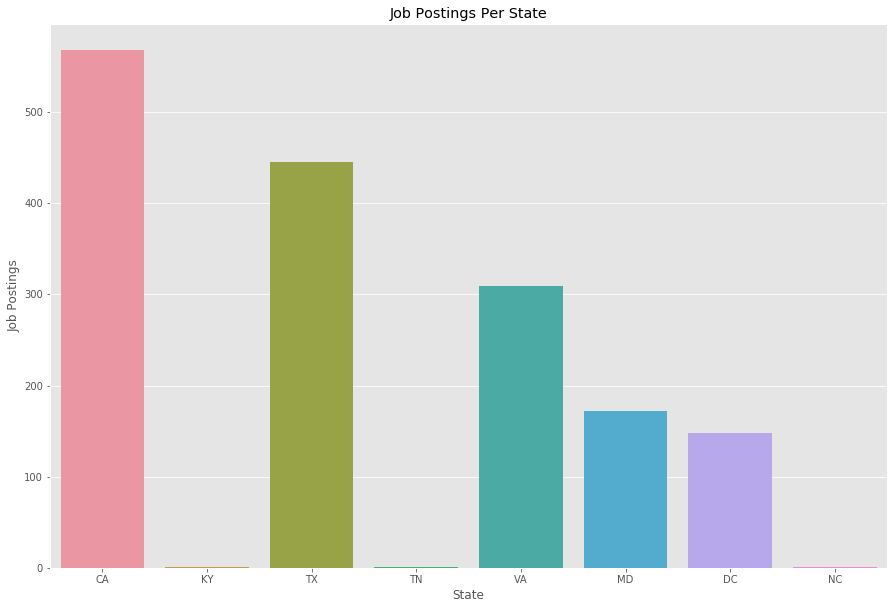

In [23]:

# Single Varible Plot 1
sns.countplot(x = job_df["State"])
plt.title('Job Postings Per State')
# Set x-axis label
plt.xlabel('State')
# Set y-axis label
plt.ylabel('Job Postings')

Text(0, 0.5, 'Job Postings')

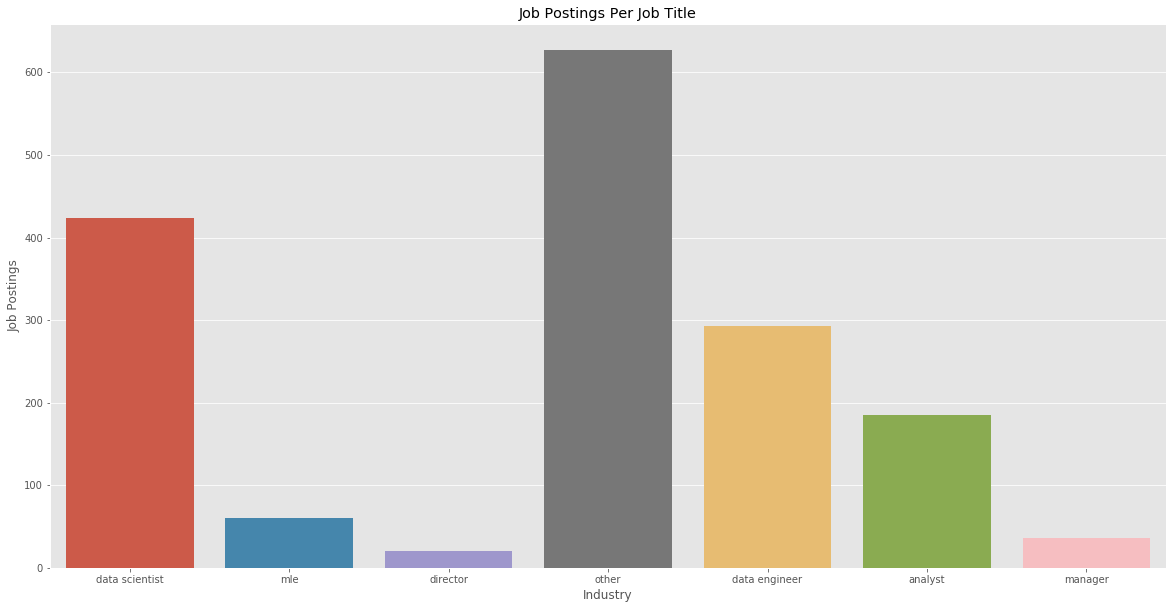

In [24]:
#Single Varible Plot 2
plt.figure(figsize=(20,10))
sns.countplot(x=job_df["job_simp"])
plt.title('Job Postings Per Job Title')
# Set x-axis label
plt.xlabel('Industry')
# Set y-axis label
plt.ylabel('Job Postings')

Text(0, 0.5, 'Job Postings')

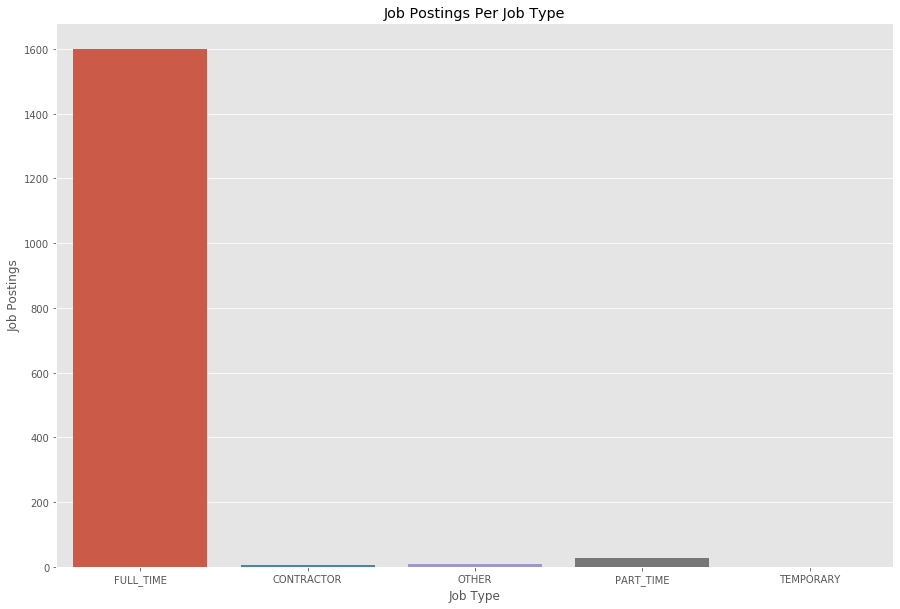

In [25]:
#Single Varible Plot 3
sns.countplot(x=job_df["Job_Type"])
plt.title('Job Postings Per Job Type')
# Set x-axis label
plt.xlabel('Job Type')
# Set y-axis label
plt.ylabel('Job Postings')

Text(0, 0.5, 'Rating')

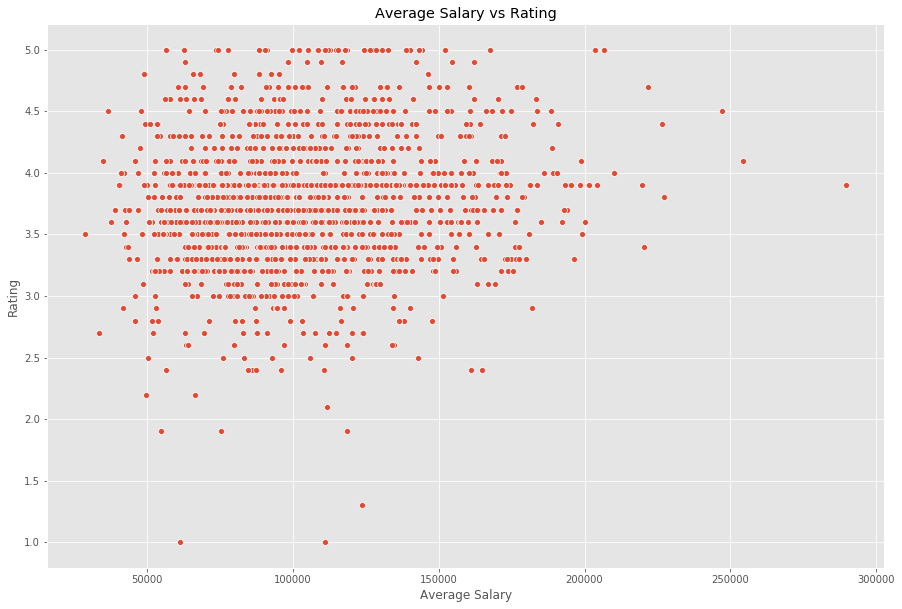

In [26]:
#Double Variable Plot 1
sns.scatterplot(job_df["Avg_Salary"], job_df["Rating"])
plt.title('Average Salary vs Rating')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Rating')

Text(0, 0.5, 'Industry')

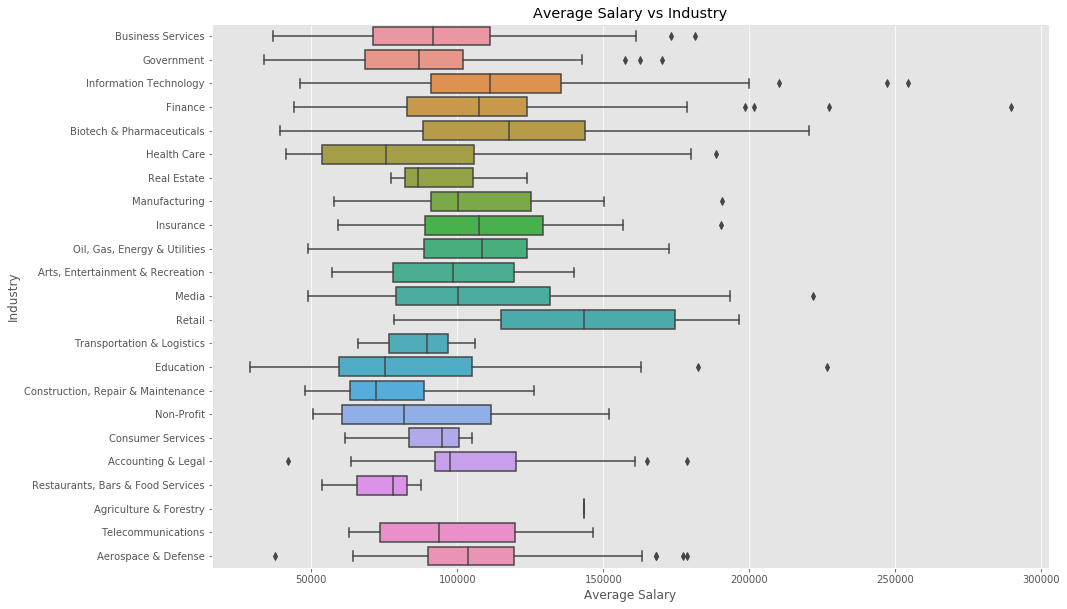

In [27]:
#Double Variable Plot 2
sns.boxplot(job_df["Avg_Salary"], job_df["Industry"])
plt.title('Average Salary vs Industry')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Industry')

Text(0, 0.5, 'Job Type')

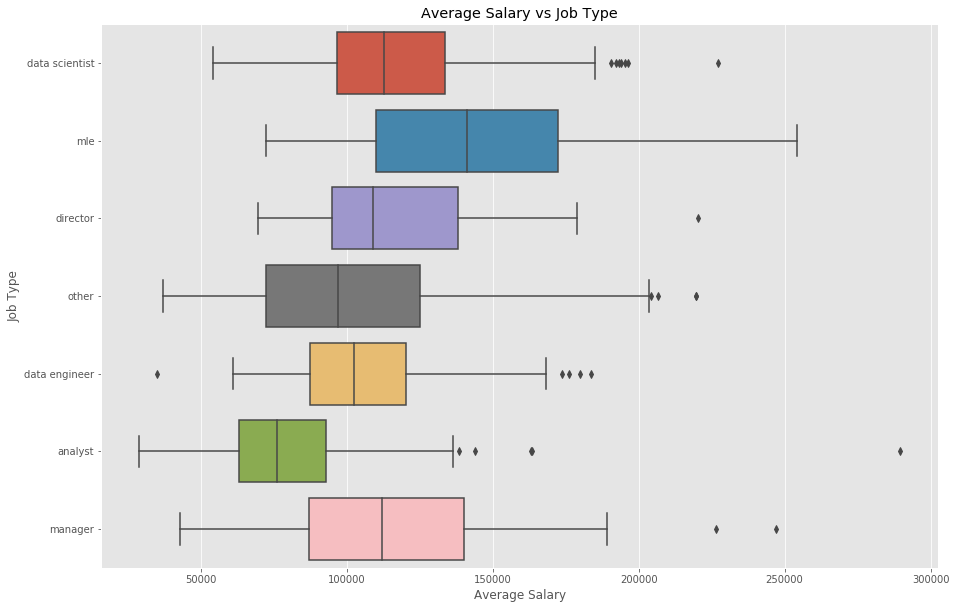

In [28]:
#Double Variable Plot 3
sns.boxplot(job_df["Avg_Salary"], job_df["job_simp"])
plt.title('Average Salary vs Job Type')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Job Type')

Text(0, 0.5, 'Rating')

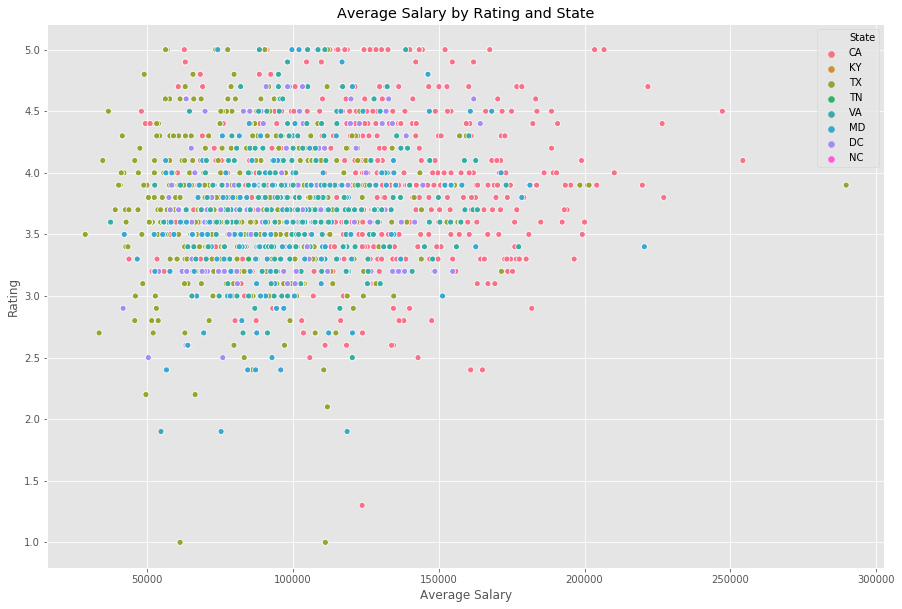

In [29]:
#Triple Variable Plot 1
sns.scatterplot(job_df["Avg_Salary"], job_df["Rating"], hue=job_df["State"])
plt.title('Average Salary by Rating and State')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

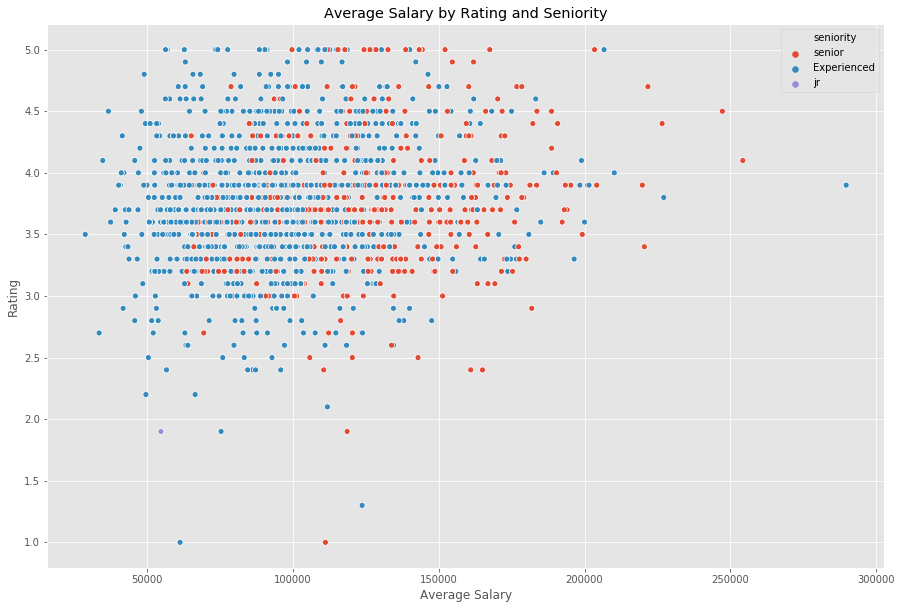

In [30]:
# Triple Variable Plot 2
sns.scatterplot(job_df["Avg_Salary"], job_df["Rating"], hue=job_df["seniority"])
plt.title('Average Salary by Rating and Seniority')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Rating')


Text(0, 0.5, 'Rating')

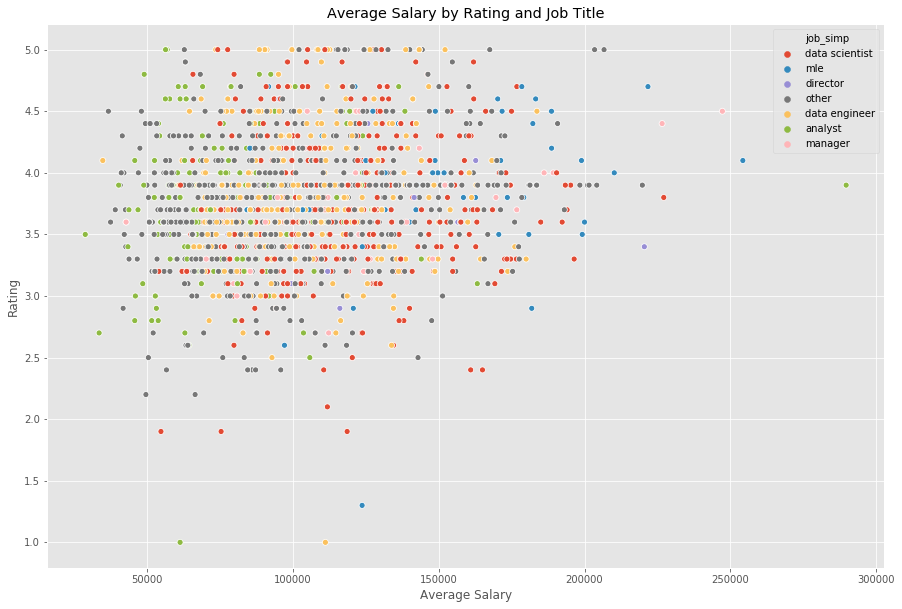

In [31]:
# Triple Varible Plot 3
sns.scatterplot(job_df["Avg_Salary"], job_df["Rating"], hue=job_df["job_simp"])
plt.title('Average Salary by Rating and Job Title')
# Set x-axis label
plt.xlabel('Average Salary')
# Set y-axis label
plt.ylabel('Rating')

In [32]:
# Average Salary based on Job Title & Seniority 
pd.pivot_table(job_df, index = ['job_simp','seniority'], values = 'Avg_Salary')

Avg_Salary
job_simp       seniority                 
analyst        Experienced   74579.253623
               senior        97858.425532
data engineer  Experienced   98937.742105
               senior       118272.849515
data scientist Experienced  109865.898387
               jr            54925.500000
               senior       135827.345133
director       Experienced  114475.447368
               senior       220490.000000
manager        Experienced  114852.038462
               senior       130814.000000
mle            Experienced  133352.525641
               senior       162722.309524
other          Experienced   92529.577586
               senior       129515.947853

## Data Modelling

- The data is first split into 2 dataframes - Data and target. Data contains the descriptive features while target contains the   target feature Avg_Salary.
- Categorical features are converted to numerical form with the help of encoding using the get dummies function.
- Split the dataset into two parts with training set being 80% and test set being 20%.
- Perform feature selection using RandomForestRegressor.
- Train the model with training set data with selected features.
- Evaluate the performance of the model using Mean Absolute Error(MAE) as evaluation metric.
- pick the model which has the lowest MAE and tune the model parameters.
- predict the values on test set with best model and fine-tuned parameters.


In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# Data Transformation

# Data 
Data = job_df.drop(["Avg_Salary"], axis = 1)
Data = pd.get_dummies(Data)


# Target
target = (job_df[["Avg_Salary"]]).values

### Feature selection

- RandomForestRegressor is used to highlight the top features which is relevant to the modelling.
- Feature importance is known by the property "feature_importances_" based on Gini impurity. 


In [34]:
from sklearn.ensemble import RandomForestRegressor
num_features =20
model_rfi = RandomForestRegressor(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [35]:
best_features_rfi = Data.columns[fs_indices_rfi].values
Data = Data[best_features_rfi]

In [36]:
# Spliting the data into train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, target, test_size=0.2, random_state=42)

In [37]:
'''
Function to plot the graph of predicted versus actual salaries.
'''

def plot_graph(actual,predicted):
    fig, ax = plt.subplots()
    ax.scatter(actual, predicted)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    ax.set_title("Plot of actual versus predicted salaries")
    ax.set_xlabel('Actual Salary')
    ax.set_ylabel('Predicted Salary')
    plt.show()

In [38]:
# Multiple linear regression 

import statsmodels.api as sm

X_sm = X = sm.add_constant(X_train)
model = sm.OLS(y_train,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     64.01
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          5.58e-177
Time:                        23:35:23   Log-Likelihood:                -15181.
No. Observations:                1316   AIC:                         3.040e+04
Df Residuals:                    1295   BIC:                         3.051e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            7.066e+04   2.67e+04      2.647      0.008    1.83e+04    1.23e+05
State_CA                         2.659e+04   1863.894     14.266      0.000    2.29e+04    3.02e+04
Rating                           4395.5961   1333.035      3.297      0.001    1780.451    7010.742
Ad Validity                        61.7920    168.948      0.366      0.715    -269.649     393.233
seniority_senior                 5.646e+04   2.52e+04      2.240      0.025    7003.533    1.06e+05
job_simp_analyst                -5.395e+04   6418.087     -8.405      0.000   -6.65e+04   -4.14e+04
seniority_Experienced             2.88e+04   2.52e+04      1.143      0.253   -2.06e+04    7.82e+04
job_simp_other                  -3.193e+04   6182.107     -5.165      0.000   -4.41e+04   -1.98e+04
python                          -4112.7504   1624.207     -2.532      0.011   -7299.116    -926.385
Industry_Information Technology  7775.4747   1876.995      4.143      0.000    4093.190    1.15e+04
State_TX                        -7856.1927   1879.816     -4.179      0.000   -1.15e+04   -4168.374
job_simp_data scientist         -1.727e+04   6289.344     -2.746      0.006   -2.96e+04   -4934.648
Industry_Finance                 1.422e+04   3418.686      4.159      0.000    7510.801    2.09e+04
aws                              -546.7746   1818.152     -0.301      0.764   -4113.620    3020.071
Industry_Aerospace & Defense     1.474e+04   2952.771      4.992      0.000    8948.140    2.05e+04
job_simp_manager                -2.509e+04   7711.164     -3.254      0.001   -4.02e+04   -9965.686
Industry_Business Services      -4265.5521   2134.745     -1.998      0.046   -8453.490     -77.614
job_simp_mle                    -6587.5798   7266.813     -0.907      0.365   -2.08e+04    7668.436
Industry_Retail                   2.41e+04   6117.803      3.940      0.000    1.21e+04    3.61e+04
visualization                    -844.5020   1938.883     -0.436      0.663   -4648.199    2959.195
job_simp_data engineer          -2.853e+04   6372.372     -4.477      0.000    -4.1e+04    -1.6e+04
==============================================================================
Omnibus:                      271.135   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.201
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                       7.883   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity o


Most of the selected parameters are significant at 5% significance level.


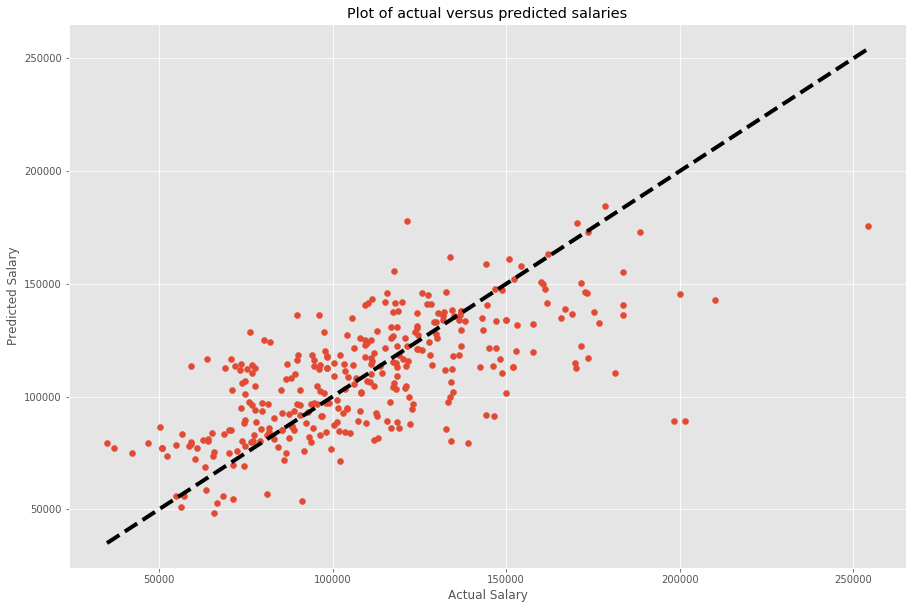

In [39]:
# Make predictions on test data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
plot_graph(y_test, predictions)

In [40]:
#Support Vector Model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma='auto')


mae_svr = round(np.mean(-cross_val_score(regressor,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)),3)
print("MAE for support vector regressor model is ",mae_svr)

MAE for support vector regressor model is  27504.6


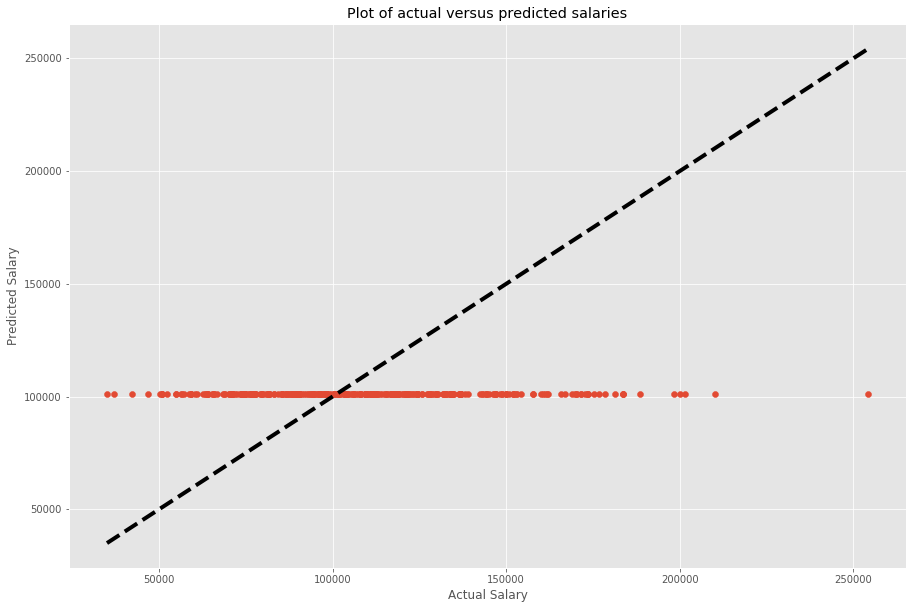

In [41]:
# Make predictions on test data
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
plot_graph(y_test, predictions)

In [42]:
# Random forest Regression

rf = RandomForestRegressor()

mae_rf = round(np.mean(-cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)),3)
print("MAE for Random Forest regressor model is ",mae_rf)

MAE for Random Forest regressor model is  19036.932


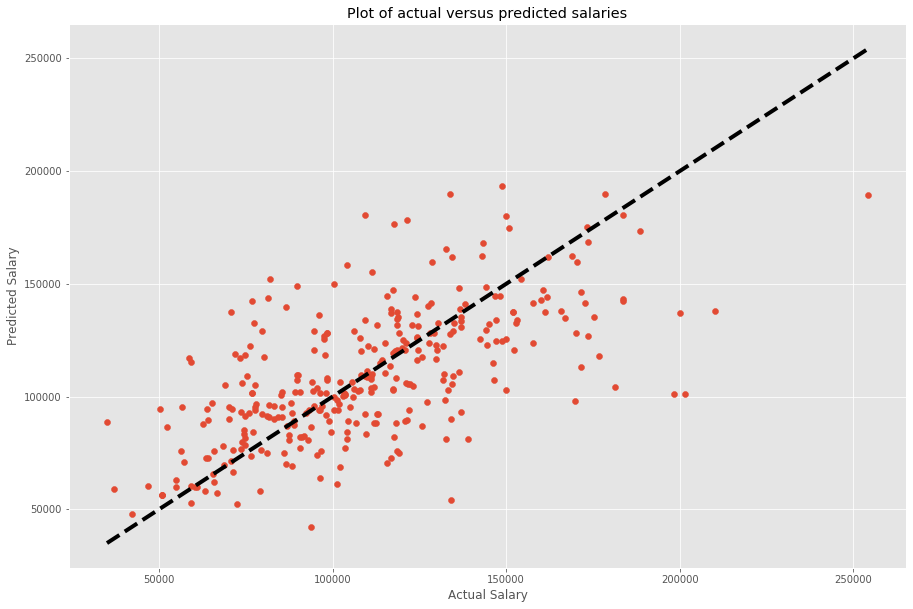

In [43]:
# Make predictions on test data
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
plot_graph(y_test, predictions)

In [44]:
# Ridge regression model 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001)

mae_ridge = round(np.mean(-cross_val_score(ridge,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)),3)
print("MAE for Ridge regressor model is",mae_ridge)

MAE for Ridge regressor model is 19174.119


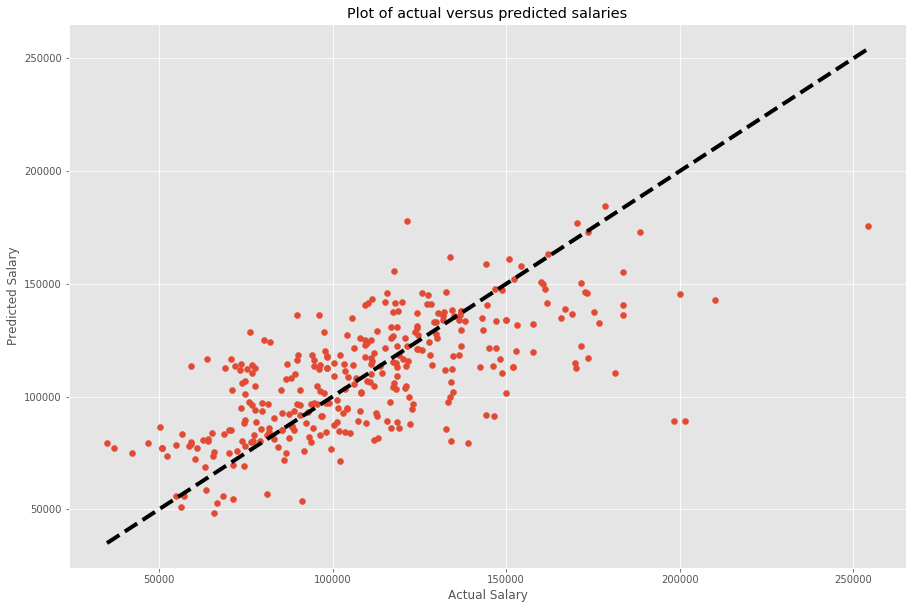

In [45]:
# Make predictions on test data
ridge.fit(X_train,y_train)
predictions = ridge.predict(X_test)
plot_graph(y_test, predictions)

In [46]:
# Lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

mae_lasso = round(np.mean(-cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)),3)
print("MAE for Lasso regressor model is",mae_lasso)

MAE for Lasso regressor model is 19163.081


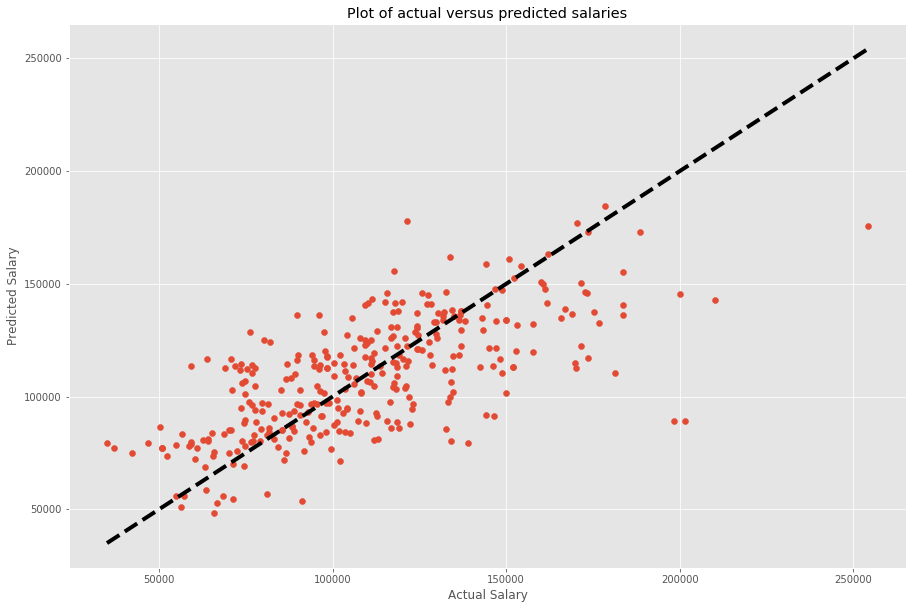

In [47]:
# Make predictions on test data
lasso.fit(X_train,y_train)
predictions = lasso.predict(X_test)
plot_graph(y_test, predictions)

In [ ]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

print("Best score is ",round(-gs.best_score_,3))
print("Optimized parameters for random forest regressor",gs.best_estimator_)

In [ ]:
rf = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
# Make predictions on test data
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
plot_graph(y_test,predictions)

## Summary

- Data Preprocessing - Checked for missing values, modified some features
- Data Exploration - Visualizations are plotted to examine single variables, two-variable relationships and three-variable       relationships.
- Various regression models like multi-linear model, Ridge model, Lasso model, Support vector regressor model and Random Forest   models were considered for training
- Random Forest regressor turned out to be best with lowest MAE among the other models while support vector regression was the    worst performing model for this dataset.
- Random forest regressor was further fine-tuned by using GridSearchCV method to find the optimal parameters.
- This model predicts with an accuracy of 65% on the un-seen data.
- However, the prediction accuracy can be improved further by incorporating neural networks, increasing the data size by         scraping more glassdoor data from the web.